### WCD data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy.ndimage as ndimage
import re
import matplotlib.dates as md
import datetime as dt

from IPython.display import Image

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

In [2]:
def smooth (data,win):
    
    N = len(data)
    step = (win-1)/2
    out = np.zeros(N)
    
    for j in range(step,N-step):
        valor = 0
        for k in range (-step,step + 1):
            valor = valor + data[j+k]

        out [j] = valor/win
    return out

In [3]:
H1420 = np.loadtxt('data/His_14_21.dat')
# Histogram sorting
V = H1420[H1420[:,0].argsort()]

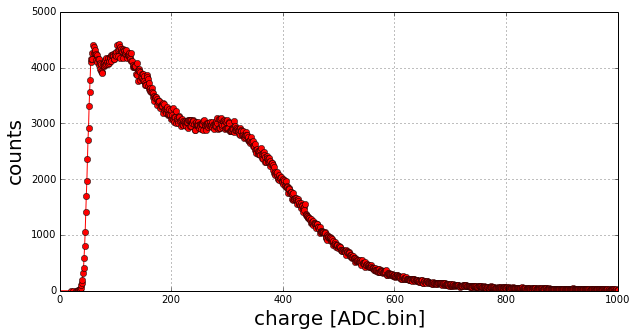

In [4]:
fig = plt.figure(figsize=(10, 5))
plt.plot(V[:,0],V[:,1], '-or')
plt.xlabel("charge [ADC.bin]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.axis([0,1000,0,5000])
plt.grid()
plt.show()

### Gaussian fit

In [5]:
hVEM = 3000
hVEE = 4300

pMuons = scipy.optimize.curve_fit(lambda t,m,s: hVEM*np.exp((-(t-m)**2)/(2*(s**2))),  V[300:400,0],  V[300:400,1],  p0=(300, 100))
mmF = pMuons[0][0]
smF = pMuons[0][1]

pEP = scipy.optimize.curve_fit(lambda t,m,s: hVEE*np.exp((-(t-m)**2)/(2*(s**2))),  V[50:150,0],  V[50:150,1],  p0=(120, 20))
meF = pEP[0][0]
seF = pEP[0][1]

charge = np.linspace(0,600,101)


muons = hVEM*np.exp((-(charge-mmF)**2)/(2*smF**2))
ep = hVEE*np.exp((-(charge-meF)**2)/(2*seF**2))

print "mean muons= " + str(mmF)
print "standard deviation muons= " + str(smF)
print "mean e/p= " + str(meF)
print "standard deviation e/p= " + str(seF)

mean muons= 280.87583622638004
standard deviation muons= 128.89233509216234
mean e/p= 108.04526918834515
standard deviation e/p= 91.69205183875859


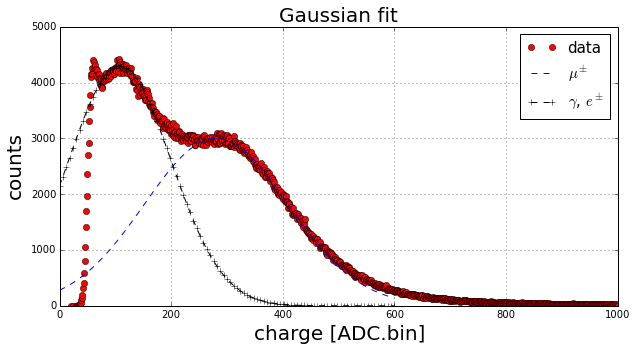

In [6]:
fig = plt.figure(figsize=(10, 5))
plt.plot(V[:,0],V[:,1], 'or',alpha=1)
plt.plot(charge, muons, '--b')
plt.plot(charge, ep, '--+k')
plt.xlabel("charge [ADC.bin]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.legend(["data", "$\mu^\pm$","$\gamma$, $e^\pm$"], fontsize = 15)
plt.title("Gaussian fit", fontsize = 20)
plt.axis([0,1000,0,5000])
plt.grid()
plt.show()

### Quadratic fit

In [7]:
hVEM = 3000
hVEE = 4300

pMuons = scipy.optimize.curve_fit(lambda t,m,s: -s*(t-m)**2+ hVEM,  V[250:350,0],  V[250:350,1],  p0=(300,0.2))
mmF = pMuons[0][0]
smF = pMuons[0][1]

pEP = scipy.optimize.curve_fit(lambda t,m,s: -s*(t-m)**2+ hVEE,  V[50:150,0],  V[50:150,1],  p0=(120,1))
meF = pEP[0][0]
seF = pEP[0][1]

charge = np.linspace(0,600,101)


muons = -smF*(charge-300)**2 + hVEM
ep = -seF*(charge-110)**2 + hVEE

print "mean muons= " + str(mmF)
print "standard deviation muons= " + str(smF)
print "mean e/p= " + str(meF)
print "standard deviation e/p= " + str(seF)

mean muons= 277.4145635490021
standard deviation muons= 0.07482668050500625
mean e/p= 107.6498724193415
standard deviation e/p= 0.227391180195912


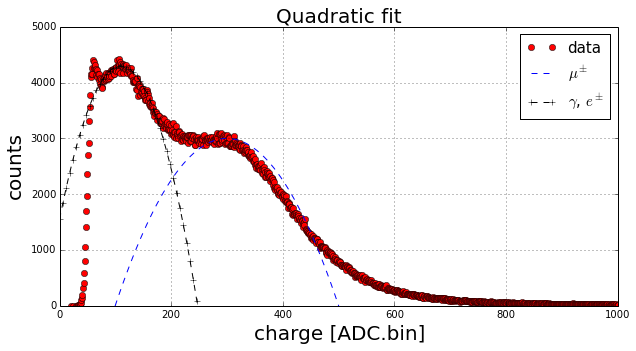

In [8]:
fig = plt.figure(figsize=(10, 5))
plt.plot(V[:,0],V[:,1], 'or')
plt.plot(charge, muons, '--b')
plt.plot(charge, ep, '--+k')
plt.xlabel("charge [ADC.bin]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.legend(["data", "$\mu^\pm$","$\gamma$, $e^\pm$"], fontsize = 15)
plt.title("Quadratic fit", fontsize = 20)
plt.axis([0,1000,0,5000])
plt.grid()
plt.show()

NameError: name 'charge' is not defined

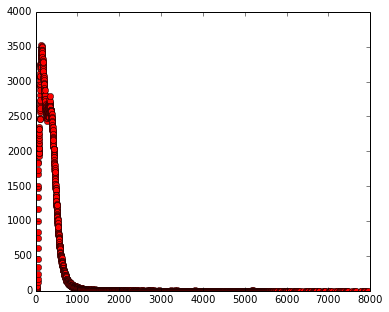

In [12]:
fig = plt.figure(figsize=(6, 5))
plt.plot(V[:,0],V[:,1], 'or')
plt.plot(charge, muons, '--b')
plt.plot(charge, ep, '--+k')
plt.xlabel("charge [ADC.bin]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.legend(["data", "$\mu^\pm$","$\gamma$, $e^\pm$"], fontsize = 15)
#plt.title("Quadratic fit", fontsize = 20)
plt.axis([0,600,0,5000])
plt.grid()
plt.show()

### Coincidence with hodoscope events

In [5]:
HH20 = np.loadtxt('data/His_H_20_00.dat')
# Histogram sorting
HH = HH20[HH20[:,0].argsort()]

In [6]:
H2000 = np.loadtxt('data/His_20_00.dat')
# Histogram sorting
HT = H2000[H2000[:,0].argsort()]

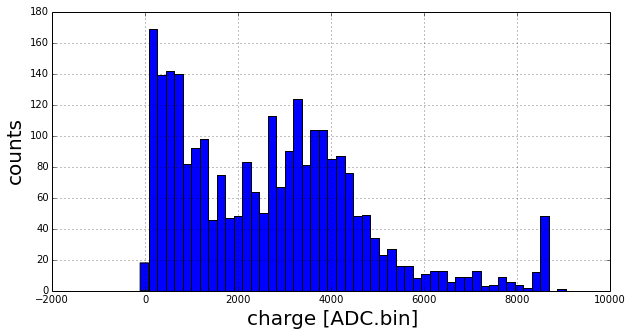

In [7]:
fig = plt.figure(figsize=(10, 5))
plt.hist(HH[:,0], bins=50) 
#plt.plot(HT[:,0],HT[:,1], 'or')
plt.xlabel("charge [ADC.bin]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.grid()
plt.show()

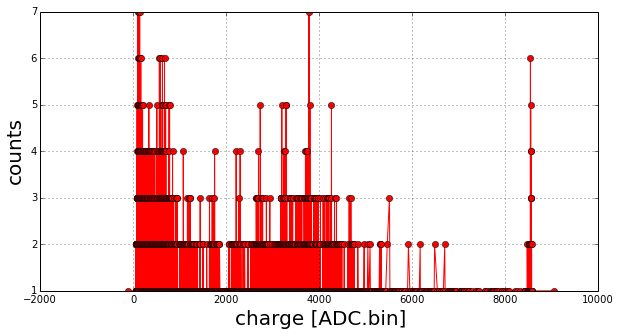

In [8]:
fig = plt.figure(figsize=(10, 5))
plt.plot(HH[:,0],HH[:,1], '-or')
plt.xlabel("charge [ADC.bin]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.grid()
plt.show()

### Long time charge analysis

In [11]:
HT = np.zeros((10000,2))

F = open("data/Histogram_WCD_Hodoscope.dat","w") 

for i in range(10):
    
    HH = np.loadtxt('data/His_H_23_0' + str(i) + '.dat')
    # Histogram sorting
    HH = HH[HH[:,0].argsort()]
    N = len(HH)
    
    for j in range(N):
        HT[j,0] = j 
        HT[int(HH[j,0]),1] = HT[int(HH[j,0]),1] + HH[j,1]
        
    # save histogram data
for k in range(N):
    F.write(str(np.round(HT[k,0]*0.72,1)))
    F.write("\t")
    F.write(str(HT[k,1]/10.0))
    F.write("\n") 
 
F.close() 

In [27]:
H2300 = np.loadtxt('data/His_23_00.dat')

Fwcd = open("data/Histogram_WCD.dat","w") 

# Histogram sorting
V = H2300[H2300[:,0].argsort()]
M = len(V)

for k in range(M):
    Fwcd.write(str(np.round(V[k,0]*0.72,1)))
    Fwcd.write("\t")
    Fwcd.write(str(V[k,1]))
    Fwcd.write("\n") 
 
Fwcd.close() 

print "Percentaje of T5 events = " + str(np.max(HT[:,1]/10)*100/np.max(V[:,1]))


Percentaje of T5 events = 0.21609326130224624


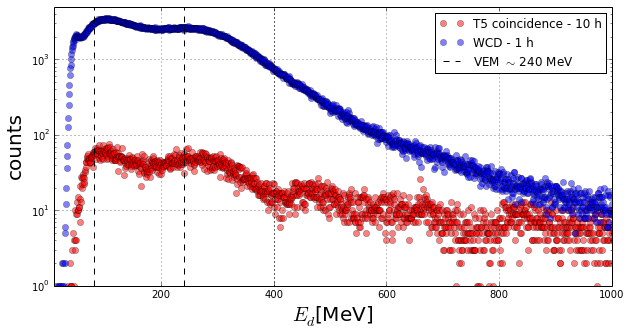

In [25]:
fig = plt.figure(figsize=(10, 5))
plt.semilogy(0.72*HT[:,0], HT[:,1],'or', alpha=0.5)
plt.plot(0.72*V[:,0],V[:,1], 'ob', alpha=0.5)
#plt.plot(V[:,0],smooth(V[:,1]*0.02/10,20), '--k', linewidth=3)
plt.axvline(x=240, color='k', linestyle='--')
plt.axvline(x=81, color='k', linestyle='--')
plt.axvline(x=400, color='k', linestyle=':')
plt.xlabel("$E_{d}$[MeV]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.legend(["T5 coincidence - 10 h","WCD - 1 h", "VEM $\sim$ 240 MeV"])
plt.axis([10,1000,0,5000])
plt.grid()

plt.savefig('figures/WCDHod.eps', format='eps', dpi=1000)

plt.show()

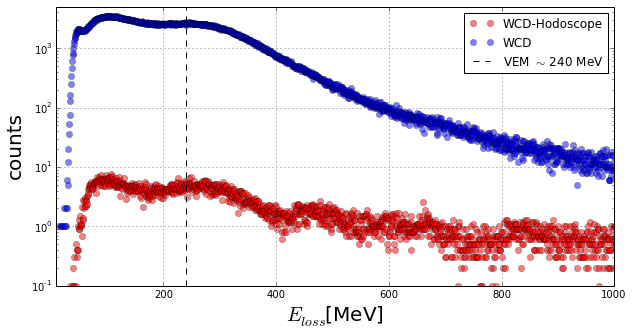

In [22]:
fig = plt.figure(figsize=(10, 5))
plt.semilogy(0.72*HT[:,0], HT[:,1]/10,'or', alpha=0.5)
plt.plot(0.72*V[:,0],V[:,1], 'ob', alpha=0.5)
#plt.plot(V[:,0],smooth(V[:,1]*0.02/10,20), '--k', linewidth=3)
plt.axvline(x=240, color='k', linestyle='--')
plt.xlabel("$E_{loss}$[MeV]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.legend(["WCD-Hodoscope","WCD", "VEM $\sim$ 240 MeV"])
plt.axis([10,1000,0,5000])
plt.grid()

plt.savefig('figures/WCDHod.eps', format='eps', dpi=1000)

plt.show()

Noise components

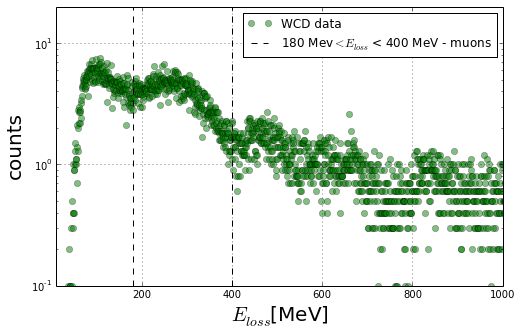

In [21]:
fig = plt.figure(figsize=(8, 5))
plt.semilogy(0.72*HT[:,0], HT[:,1]/10.0,'og', alpha=0.5)
#plt.plot(0.72*V[:,0],V[:,1], 'ob', alpha=0.5)
plt.axvline(x=180, color='k', linestyle='--')
plt.axvline(x=400, color='k', linestyle='--')
plt.xlabel("$E_{loss}$[MeV]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.legend(["WCD data", "180 Mev$< E_{loss}$ < 400 MeV - muons"])
plt.axis([10,1000,0,20])
plt.grid()

plt.savefig('figures/WCD_Eloss.eps', format='eps', dpi=1000)

plt.show()

### Estimation of the noise percentaje

In [30]:
Flux_hod = np.sum(HT[:,1]/10)
Total = np.sum(V[:,1]) 
Ratio = Flux_hod*100/Total

print "Total flux :        " + str(Total)
print "Hodoscope flux :    " + str(Flux_hod)
print "Ratio :             " + str(Ratio)

N = len(HT[:,1])
M = len(V[:,1])

Muons = 0
EM = 0
Multi = 0

for i in range(N):
    if HT[i,0]*0.72 < 170:
        EM = EM + HT[i,1]/10
    if HT[i,0]*0.72 >= 170 and HT[i,0]*0.72 < 400:
        Muons = Muons + HT[i,1]/10
    if HT[i,0]*0.72 >= 400:
        Multi = Multi + HT[i,1]/10
        
print "Electron/positron : " + str(EM)
print "Muons :             " + str(Muons)
print "Multi :             " + str(Multi)

Total flux :        1280132.0
Hodoscope flux :    3515.9
Ratio :             0.27465136407807944
Electron/positron : 1262.799999999926
Muons :             1182.4000000000003
Multi :             1070.699999999997


### Muonic component estimation

In [6]:
n_muon = 0
n_total = 0

for i in range(len(HT)):
    n_total = n_total + HT[i]/10
    if (200 > i < 500):
        n_muon = n_muon + HT[i]/10
        
print "Portion of the muonic component = " + str(n_muon*100/n_total)

Portion of the muonic component = [ 0.822688   17.63702039]


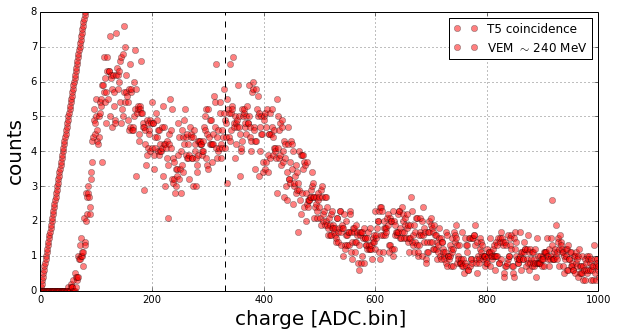

In [7]:
fig = plt.figure(figsize=(10, 5))
plt.plot(HT/10, 'or', alpha=0.5)
plt.axvline(x=331, color='k', linestyle='--')
plt.xlabel("charge [ADC.bin]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.legend(["T5 coincidence", "VEM $\sim$ 240 MeV"])
plt.axis([0,1000,0,8])
plt.grid()
plt.show()

In [6]:
hVEM = 2700
hVEE = 3500

pMuons = scipy.optimize.curve_fit(lambda t,m,s: -s*(t-m)**2+ hVEM,  V[250:400,0],  V[250:400,1],  p0=(400,0.5))
mmF = pMuons[0][0]
smF = pMuons[0][1]

pEP = scipy.optimize.curve_fit(lambda t,m,s: -s*(t-m)**2+ hVEE,  V[50:150,0],  V[50:150,1],  p0=(120,1))
meF = pEP[0][0]
seF = pEP[0][1]


charge = np.linspace(0,600,12001)


muons = -smF*(charge-mmF)**2 + hVEM
ep = -seF*(charge-meF)**2 + hVEE


print "mean muons= " + str(mmF)
print "standard deviation muons= " + str(smF)
print "mean e/p= " + str(meF)
print "standard deviation e/p= " + str(seF)

mean muons= 331.4857403384124
standard deviation muons= 0.07138433735335321
mean e/p= 147.55374472359622
standard deviation e/p= 0.3821473403124059


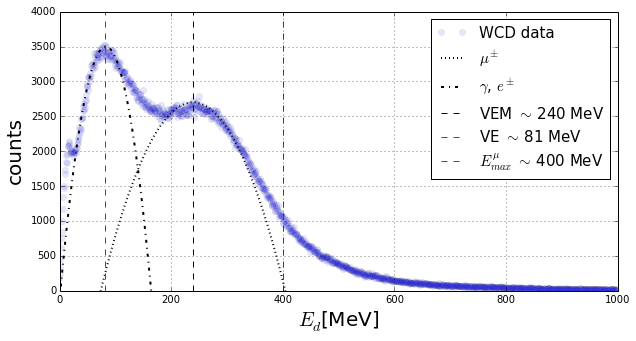

In [7]:
fig = plt.figure(figsize=(10, 5))
#plt.plot(HT*10, '-or', alpha=0.2)
plt.plot(0.85*(V[:,0]-50),V[:,1], 'ob', alpha=0.1)
plt.plot(0.85*(charge-50), muons, ':k', lw=2)
plt.plot(0.85*(charge-50), ep, '-.k', lw=2)
plt.axvline(x=240, color='k', linestyle='--')
plt.axvline(x=81, color='r', linestyle='--')
plt.axvline(x=400, color='g', linestyle='--')
plt.xlabel("$E_{d}$[MeV]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.legend(["WCD data", "$\mu^\pm$", "$\gamma$, $e^\pm$", "VEM $\sim$ 240 MeV", "VE $\sim$ 81 MeV", "$E^{\mu}_{max}$ $\sim$ 400 MeV" ], fontsize = 15)
#plt.title("Quadratic fit", fontsize = 20)
plt.axis([0,1000,0,4000])
plt.grid()

plt.savefig('figures/WCDRes.eps', format='eps', dpi=1000)
plt.show()

### Energy calibrated

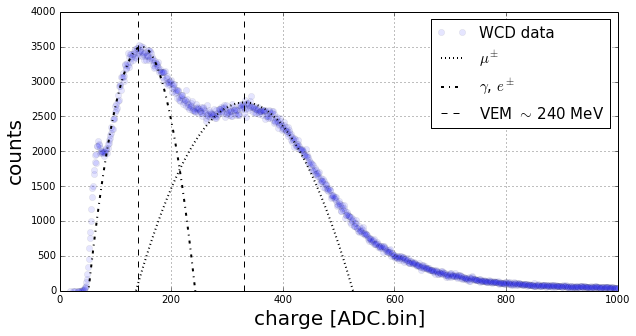

In [8]:
fig = plt.figure(figsize=(10, 5))
plt.plot(V[:,0],V[:,1], 'ob', alpha=0.1)
plt.plot(charge, muons, ':k', lw=2)
plt.plot(charge, ep, '-.k', lw=2)
plt.axvline(x=331, color='k', linestyle='--')
plt.axvline(x=140, color='k', linestyle='--')
plt.xlabel("charge [ADC.bin]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.legend(["WCD data", "$\mu^\pm$", "$\gamma$, $e^\pm$", "VEM $\sim$ 240 MeV" ], fontsize = 15)
#plt.title("Quadratic fit", fontsize = 20)
plt.axis([0,1000,0,4000])
plt.grid()

plt.savefig('figures/WCDRes.eps', format='eps', dpi=1000)
plt.show()

### Photo-electron histogram

In [9]:
PMTg = 0.3e6
R = 50
Basisg = 20
qe = 1.6e-19
ADCv = 0.97e-3
dT = 25e-9

Fac = dT*ADCv/(Basisg*R*PMTg*qe)

pe = V[:,0]*Fac
VEMpe = mmF*Fac

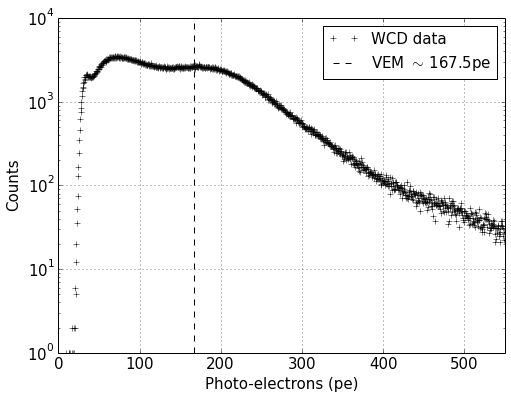

In [10]:
fig = plt.figure(figsize=(8, 6))
plt.semilogy(pe,V[:,1], '+k', alpha=1)
plt.axvline(x=VEMpe, color='k', linestyle='--')
plt.xlabel("Photo-electrons (pe)", fontsize = 15)
plt.ylabel("Counts", fontsize = 15)
plt.legend(["WCD data", "VEM $\sim$ " + str(np.round(VEMpe,1)) +"pe" ], fontsize = 15)
#plt.title("Quadratic fit", fontsize = 20)
plt.axis([0,550,0,10000])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid()
plt.show()

In [14]:
a = open('WCD_pe_espectrum.txt', 'w')

for i in range(len(pe)):
    a.write(str(pe[i]) + ' ' +  str(V[i,1]) + '\n')
a.close()

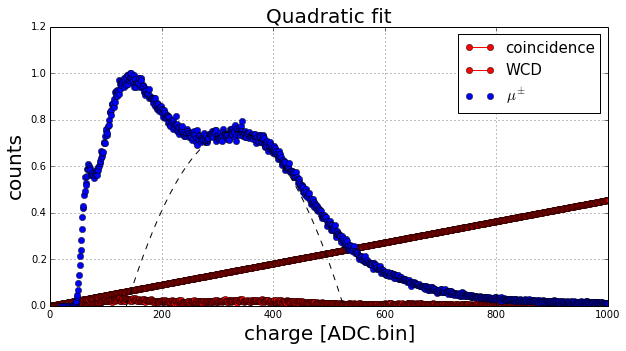

In [23]:
fig = plt.figure(figsize=(10, 5))
plt.plot(HT/np.max(HT), '-or')
plt.plot(V[:,0],V[:,1]/np.max(V[:,1]), 'ob')
plt.plot(charge, 0.75*muons/np.max(muons), '--k')
plt.xlabel("charge [ADC.bin]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.legend(["coincidence", "WCD", "$\mu^\pm$"], fontsize = 15)
plt.title("Quadratic fit", fontsize = 20)
plt.axis([0,1000,0,1.2])
plt.grid()
plt.show()

###  Hourly rate analysis

In [12]:
rate_WCD = np.loadtxt('data/Rate_WCD_23_00.dat')
rate_P1 = np.loadtxt('data/Rate_P1_23_00.dat')
rate_P2 = np.loadtxt('data/Rate_P2_23_00.dat')


In [13]:
dates = [dt.datetime.fromtimestamp(ts) for ts in  rate_WCD[:,0]]
date_WCD = md.date2num(dates)

dates = [dt.datetime.fromtimestamp(ts) for ts in  rate_P1[:,0]]
date_P1 = md.date2num(dates)

dates = [dt.datetime.fromtimestamp(ts) for ts in  rate_P2[:,0]]
date_P2 = md.date2num(dates)


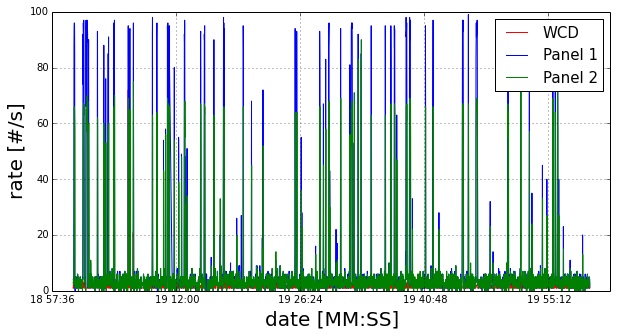

In [14]:
fig = plt.figure(figsize=(10, 5))
plt.plot(date_WCD, rate_WCD[:,1], 'r')
plt.plot(date_P1, rate_P1[:,1], 'b')
plt.plot(date_P2, rate_P2[:,1], 'g')
ax=plt.gca()
xfmt = md.DateFormatter('%H %M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.xlabel("date [MM:SS]", fontsize = 20)
plt.ylabel("rate [#/s]", fontsize = 20)
plt.legend(["WCD", "Panel 1", "Panel 2"], fontsize =15)
plt.grid()
plt.show()

### Filtering of noise rate

In [15]:
rate_WCD = rate_WCD[rate_WCD[:,1] < 10]
rate_P1 = rate_P1[rate_P1[:,1] < 10]
rate_P2 = rate_P2[rate_P2[:,1] < 10]

dates = [dt.datetime.fromtimestamp(ts) for ts in  rate_WCD[:,0]]
date_WCD = md.date2num(dates)

dates = [dt.datetime.fromtimestamp(ts) for ts in  rate_P1[:,0]]
date_P1 = md.date2num(dates)

dates = [dt.datetime.fromtimestamp(ts) for ts in  rate_P2[:,0]]
date_P2 = md.date2num(dates)

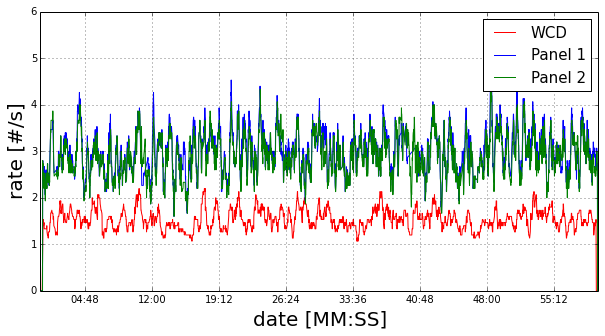

In [16]:
fig = plt.figure(figsize=(10, 5))
plt.plot(date_WCD, smooth(rate_WCD[:,1],15), 'r')
plt.plot(date_P1, smooth(rate_P1[:,1],15), 'b')
plt.plot(date_P2, smooth(rate_P2[:,1],15), 'g')
ax=plt.gca()
xfmt = md.DateFormatter('%M:%S')
ax.xaxis.set_major_formatter(xfmt)
ax.set_ylim([0,6])
plt.xlabel("date [MM:SS]", fontsize = 20)
plt.ylabel("rate [#/s]", fontsize = 20)
plt.legend(["WCD", "Panel 1", "Panel 2"], fontsize =15)
ax.set_xlim([min(date_P1),max(date_P1)])
plt.grid()
plt.show()

### Several hours

In [17]:
rate_WCD = np.loadtxt('data/Rate_WCD_23.dat')
rate_P1 = np.loadtxt('data/Rate_P1_23.dat')
rate_P2 = np.loadtxt('data/Rate_P2_23.dat')

In [18]:
temp_P1 = np.loadtxt('data/tempP1_2019_03.dat')
temp_P2 = np.loadtxt('data/tempP2_2019_03.dat')

In [19]:
rate_WCD = rate_WCD[rate_WCD[:,1] < 10]
rate_P1 = rate_P1[rate_P1[:,1] < 10]
rate_P2 = rate_P2[rate_P2[:,1] < 10]

temp_P1 = temp_P1[temp_P1[:,1] < 30]

dates = [dt.datetime.fromtimestamp(ts) for ts in  rate_WCD[:,0]]
date_WCD = md.date2num(dates)

dates = [dt.datetime.fromtimestamp(ts) for ts in  rate_P1[:,0]]
date_P1 = md.date2num(dates)

dates = [dt.datetime.fromtimestamp(ts) for ts in  rate_P2[:,0]]
date_P2 = md.date2num(dates)

dates = [dt.datetime.fromtimestamp(ts) for ts in  temp_P1[:,0]]
date_TP1 = md.date2num(dates)

dates = [dt.datetime.fromtimestamp(ts) for ts in  temp_P2[:,0]]
date_TP2 = md.date2num(dates)

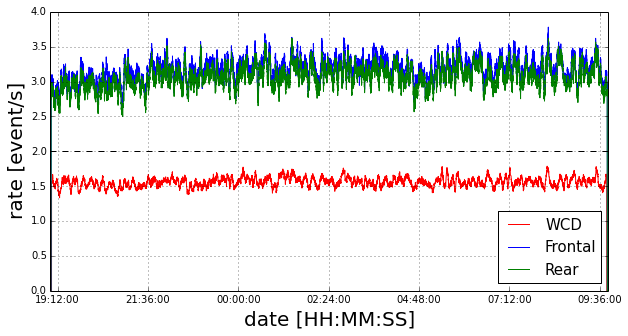

In [20]:
fig = plt.figure(figsize=(10, 5))
plt.plot(date_WCD, smooth(rate_WCD[:,1],150), 'r')
plt.plot(date_P1, smooth(rate_P1[:,1],150), 'b')
plt.plot(date_P2, smooth(rate_P2[:,1],150), 'g')
plt.axhline(y=2, color='k', linestyle='--')
ax=plt.gca()
xfmt = md.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.xlabel("date [HH:MM:SS]", fontsize = 20)
plt.ylabel("rate [event/s]", fontsize = 20)
plt.legend(["WCD", "Frontal", "Rear"], fontsize =15, loc=4)
ax.set_xlim([min(date_P1),max(date_P1)])
ax.set_ylim([0,4])
plt.grid()

plt.savefig('HodWCDRate.eps', format='eps', dpi=1000)

plt.show()

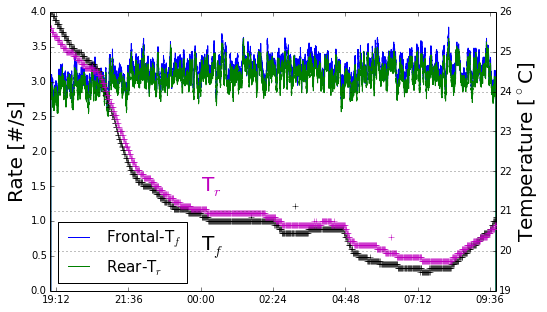

In [20]:
fig, ax1= plt.subplots(figsize=(8, 5))
ax1.plot(date_P1, smooth(rate_P1[:,1],150), 'b')
ax1.plot(date_P2, smooth(rate_P2[:,1],150), 'g')
ax1.set_ylabel("Rate [#/s]", fontsize = 20)
plt.legend(["Frontal-T$_f$", "Rear-T$_r$"], fontsize =15, loc=3)

ax2 = ax1.twinx()

ax2.plot(date_TP1, temp_P1[:,1], '+k')
ax2.plot(date_TP2, temp_P2[:,1], '+m')

ax=plt.gca()
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
ax2.set_xlabel("date [HH:MM]", fontsize = 20)
ax2.set_ylabel("Temperature [$^{\circ}$C]", fontsize = 20)
ax2.set_xlim([min(date_P1),max(date_P1)])

ax2.text(dt.date(2019, 3, 23), 21.5, "T$_r$", color='m', fontsize = 20)
ax2.text(dt.date(2019, 3, 23), 20, "T$_f$", color='k', fontsize = 20)

plt.grid()
plt.show()

### Coincidence analysis with the hodoscope

In [21]:
rate_WCD_sT = np.loadtxt('data/Rate_WCD_wST_23_00.dat')
rate_P1_sT = np.loadtxt('data/Rate_P1_sT_23_00.dat')
rate_P2_sT = np.loadtxt('data/Rate_P2_sT_23_00.dat')

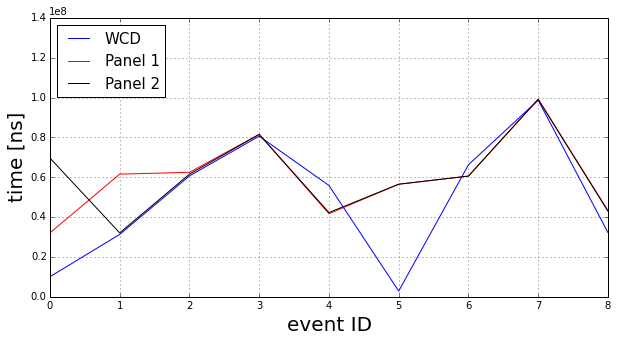

In [22]:
fig = plt.figure(figsize=(10, 5))
plt.plot(rate_WCD_sT[:,1])
plt.plot(rate_P1_sT[:,1], 'r')
plt.plot(rate_P2_sT[2::,1], 'k')
plt.xlabel("event ID", fontsize = 20)
plt.ylabel("time [ns]", fontsize = 20)
plt.legend(["WCD", "Panel 1", "Panel 2"], fontsize =15, loc=2)
ax=plt.gca()
ax.set_xlim(0,8)
plt.grid()
plt.show()

In [36]:
nTime_d = rate_P1_sT[0:8,1]/rate_WCD_sT[0:8,1]
nTime_d

array([ 3.18382929,  1.96593968,  1.02989057,  1.01110963,  0.74633917,
       19.66522891,  0.9141839 ,  1.00452046])

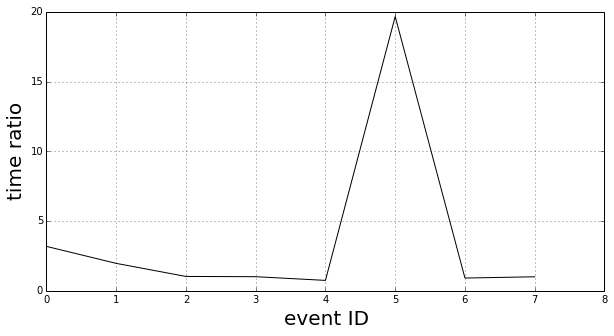

In [37]:
fig = plt.figure(figsize=(10, 5))
plt.plot(nTime_d,'k')
plt.xlabel("event ID", fontsize = 20)
plt.ylabel("time ratio", fontsize = 20)
ax=plt.gca()
ax.set_xlim(0,8)
plt.grid()
plt.show()

In [23]:
rate_WCD_sT = np.loadtxt('data/Rate_WCD_wST_23_01.dat')
rate_P1_sT = np.loadtxt('data/Rate_P1_sT_23_01.dat')
rate_P2_sT = np.loadtxt('data/Rate_P2_sT_23_01.dat')

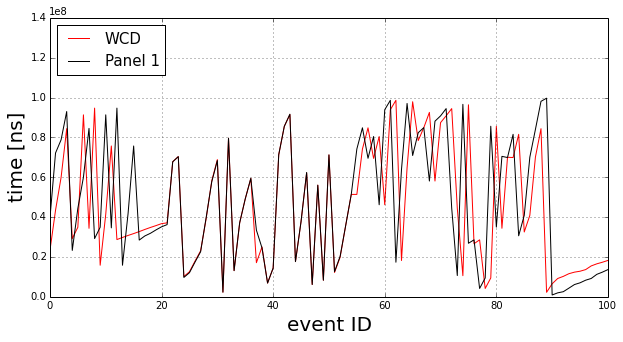

In [24]:
fig = plt.figure(figsize=(10, 5))
#plt.plot(rate_WCD_sT[:,1])
plt.plot(rate_P1_sT[:,1], 'r')
plt.plot(rate_P2_sT[:,1], 'k')
plt.xlabel("event ID", fontsize = 20)
plt.ylabel("time [ns]", fontsize = 20)
plt.legend(["WCD", "Panel 1", "Panel 2"], fontsize =15, loc=2)
ax=plt.gca()
ax.set_xlim(0,100)
plt.grid()
plt.show()

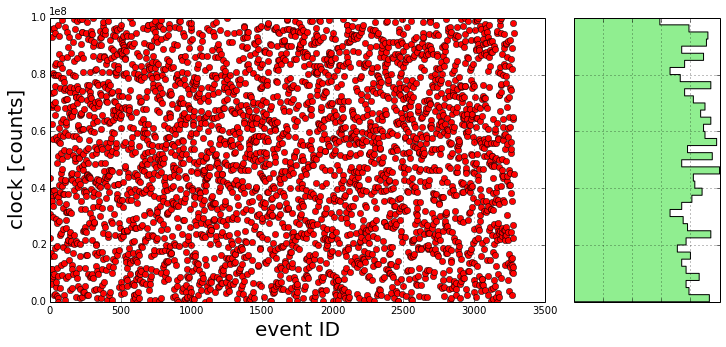

In [40]:
df = rate_WCD_sT[:,1]

fig = plt.figure(figsize=(12, 7))
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

ax_main = fig.add_subplot(grid[:-1, :-1])
plt.ylabel("clock [counts] ", fontsize=20)
plt.xlabel("event ID", fontsize=20)

ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])

ax_main.plot(df, 'or')
ax_main.grid()

ax_right.hist(df, 40, histtype='stepfilled', orientation='horizontal', color='lightgreen')
ax_right.grid()

plt.show()

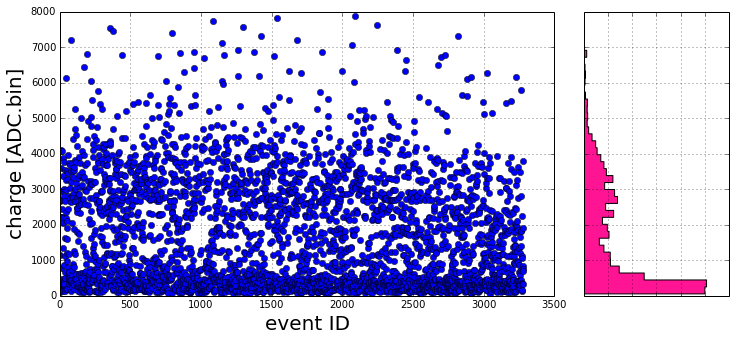

In [41]:
df = rate_WCD_sT[:,2]

fig = plt.figure(figsize=(12, 7))
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

ax_main = fig.add_subplot(grid[:-1, :-1])
plt.ylabel("charge [ADC.bin]", fontsize=20)
plt.xlabel("event ID", fontsize=20)

ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])

ax_main.plot(df, 'ob')
ax_main.grid()

ax_right.hist(df, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')
ax_right.grid()

plt.show()

### Charge-Peak histogram (Muon-EM separation)

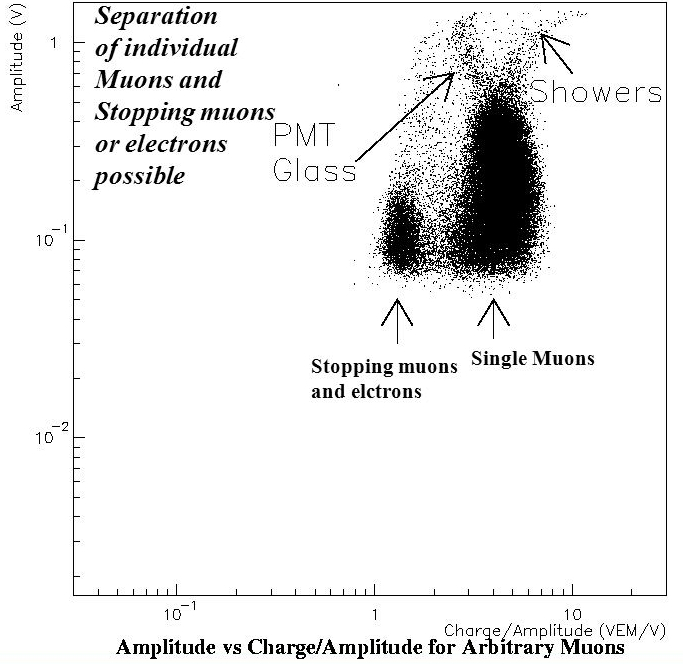

In [25]:
Image(filename='figures/EM_Muon_Sep.jpg', width=500)

In [26]:
data = np.loadtxt("data/Charge_Peak_Ch2.dat")
charge = data[:,0]
peak = data[:,1]

<function matplotlib.pyplot.show>

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


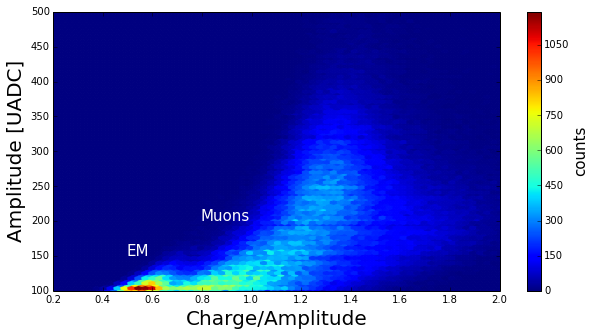

In [44]:
fig = plt.figure(figsize=(10, 5))
hb = plt.hexbin(charge/peak, peak, gridsize=200)
plt.xlabel("Charge/Amplitude", fontsize=20)
plt.ylabel("Amplitude [UADC]", fontsize=20)
plt.text(0.5,150,"EM", fontsize=15, color="white")
plt.text(0.8,200,"Muons", fontsize=15, color="white")
plt.axis([0.2,2,100,500])

cb = fig.colorbar(hb)
cb.set_label('counts', fontsize=15)

plt.show

### Angle calculation

In [45]:
theta = np.arctan((peak-50)/25.0)

<function matplotlib.pyplot.show>

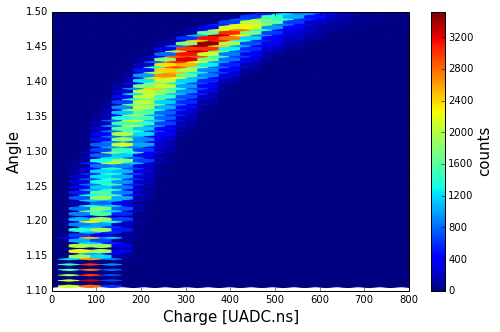

In [46]:
fig = plt.figure(figsize=(8, 5))
hb = plt.hexbin(charge, theta, gridsize=100)
plt.xlabel("Charge [UADC.ns]", fontsize=15)
plt.ylabel("Angle", fontsize=15)
plt.axis([0,800,1.1,1.5])

cb = fig.colorbar(hb)
cb.set_label('counts', fontsize=15)

plt.show

<function matplotlib.pyplot.show>

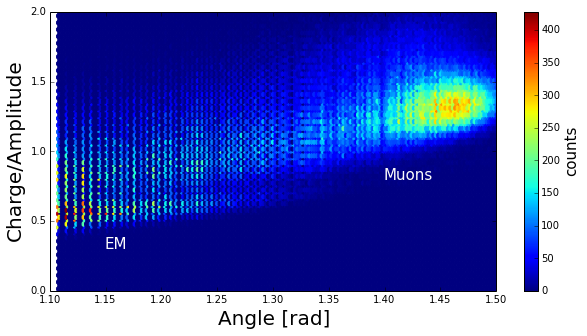

In [47]:
fig = plt.figure(figsize=(10, 5))
hb = plt.hexbin(theta, charge/peak, gridsize=200)
plt.xlabel("Angle [rad]", fontsize=20)
plt.ylabel("Charge/Amplitude", fontsize=20)
plt.text(1.15, 0.3,"EM", fontsize=15, color="white")
plt.text(1.4,0.8,"Muons", fontsize=15, color="white")
plt.axis([1.1,1.5, 0,2])

cb = fig.colorbar(hb)
cb.set_label('counts', fontsize=15)

plt.show

### A day-data analysis

In [48]:
data = np.loadtxt("data/Charge_Peak_Ch2_2h.dat")
charge = data[:,0]
peak = data[:,1]

<function matplotlib.pyplot.show>

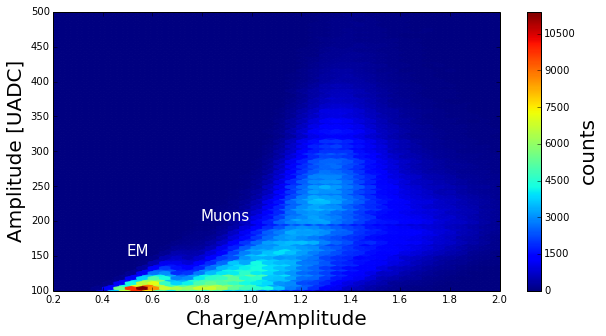

In [49]:
fig = plt.figure(figsize=(10, 5))
hb = plt.hexbin(charge/peak, peak, gridsize=200)
plt.xlabel("Charge/Amplitude", fontsize=20)
plt.ylabel("Amplitude [UADC]", fontsize=20)
plt.text(0.5,150,"EM", fontsize=15, color="white")
plt.text(0.8,200,"Muons", fontsize=15, color="white")
plt.axis([0.2,2,100,500])

cb = fig.colorbar(hb)
cb.set_label('counts', fontsize=20)

plt.show

In [50]:
theta = np.arctan((peak-50)/25.0)

<function matplotlib.pyplot.show>

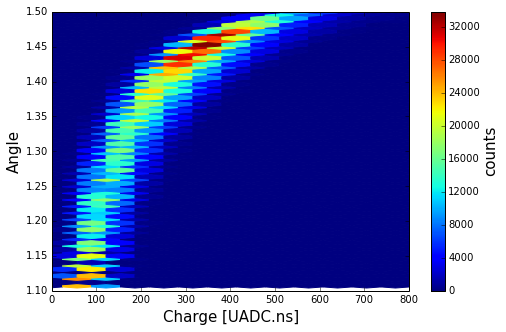

In [51]:
fig = plt.figure(figsize=(8, 5))
hb = plt.hexbin(charge, theta, gridsize=80)
plt.xlabel("Charge [UADC.ns]", fontsize=15)
plt.ylabel("Angle", fontsize=15)
plt.axis([0,800,1.1,1.5])

cb = fig.colorbar(hb)
cb.set_label('counts', fontsize=15)

plt.show

<function matplotlib.pyplot.show>

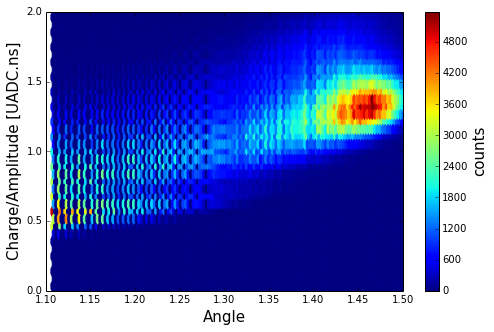

In [52]:
fig = plt.figure(figsize=(8, 5))
hb = plt.hexbin(theta, charge/peak, gridsize=150)
plt.xlabel("Angle", fontsize=15)
plt.ylabel("Charge/Amplitude [UADC.ns]", fontsize=15)
plt.axis([1.1,1.5, 0,2])

cb = fig.colorbar(hb)
cb.set_label('counts', fontsize=15)

plt.show